In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sales Insight Dashboard for Retail Store using Python and Data Analytics


# Phase 1: Data Collection & Setup

In [3]:
# df=pd.read_csv("superstore.csv")
df = pd.read_csv("superstore.csv", encoding='ISO-8859-1')

In [8]:
# df

In [5]:
print(df.shape)

(9994, 21)


In [6]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


 # Phase 2: Data Cleaning & Preprocessing

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [12]:
# df

In [13]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [14]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Phase 3: Exploratory Data Analysis (EDA)

## 1. Total Sales Over Time

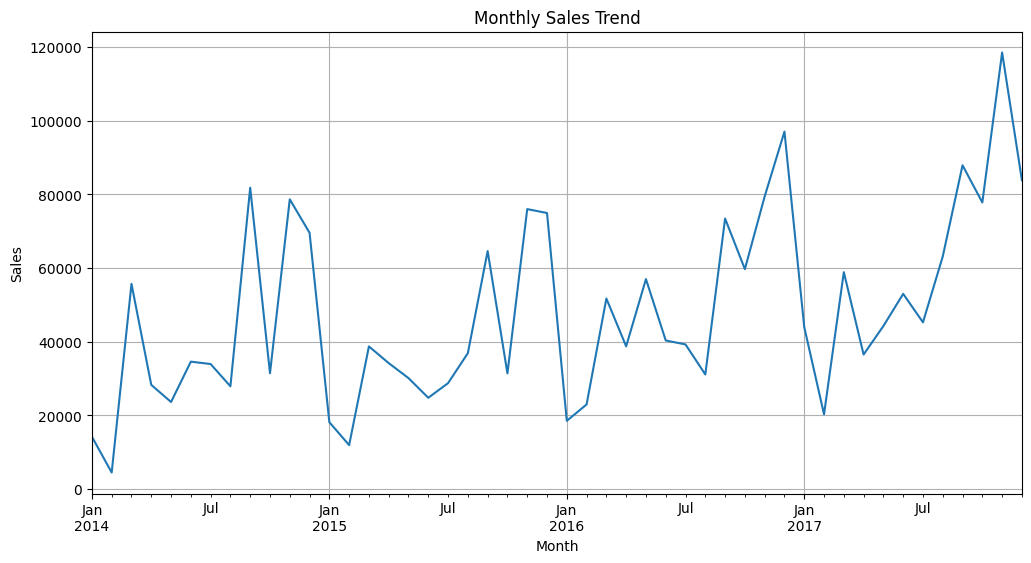

In [15]:
df['month_year'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

## 2. Sales by Product Category

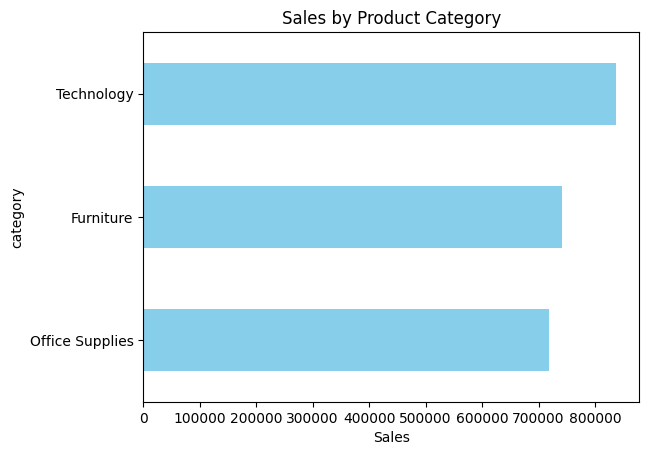

In [16]:
category_sales = df.groupby('category')['sales'].sum().sort_values()

category_sales.plot(kind='barh', color='skyblue')
plt.title('Sales by Product Category')
plt.xlabel('Sales')
plt.show()

## 3. Top 10 Most Profitable Products

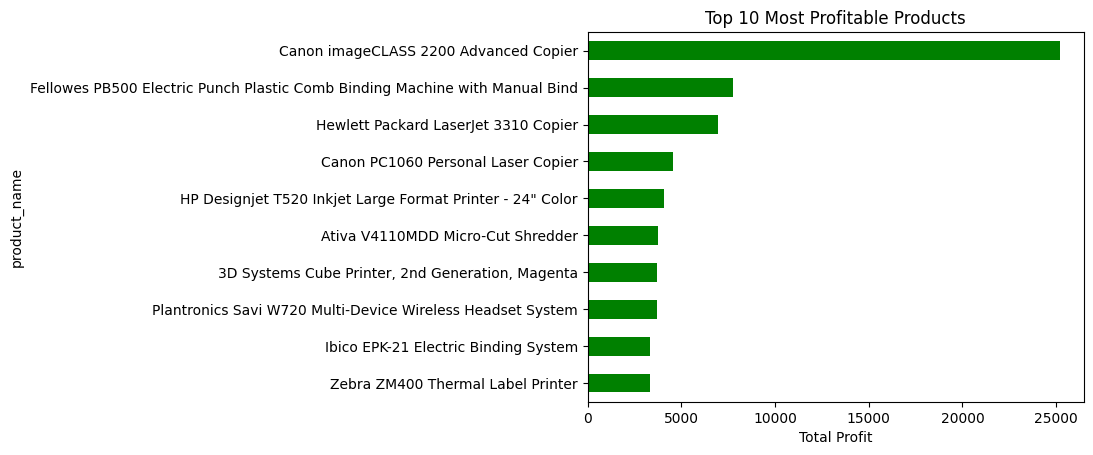

In [17]:
top_products = df.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', color='green')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.gca().invert_yaxis()
plt.show()

## 4. Correlation Heatmap

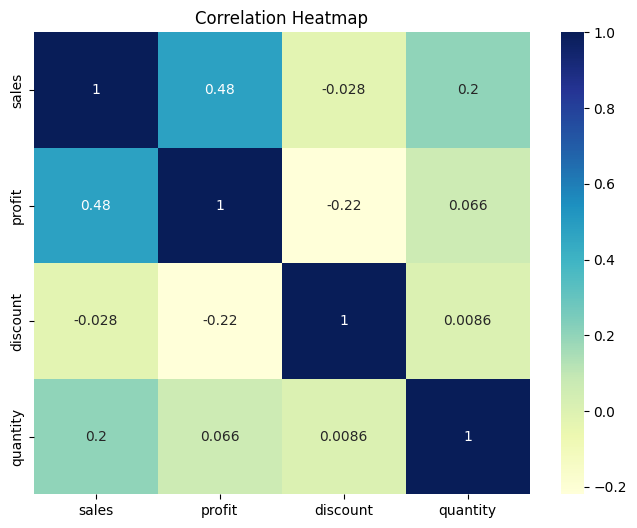

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['sales', 'profit', 'discount', 'quantity']].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

# Phase 4: Data Visualization & Reporting

## Add annotations and summaries like:

In [19]:
total_sales = df['sales'].sum()
max_sales_month = monthly_sales.idxmax()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Peak Sales Month: {max_sales_month}")

Total Sales: $2,297,200.86
Peak Sales Month: 2017-11


## Save visualizations:

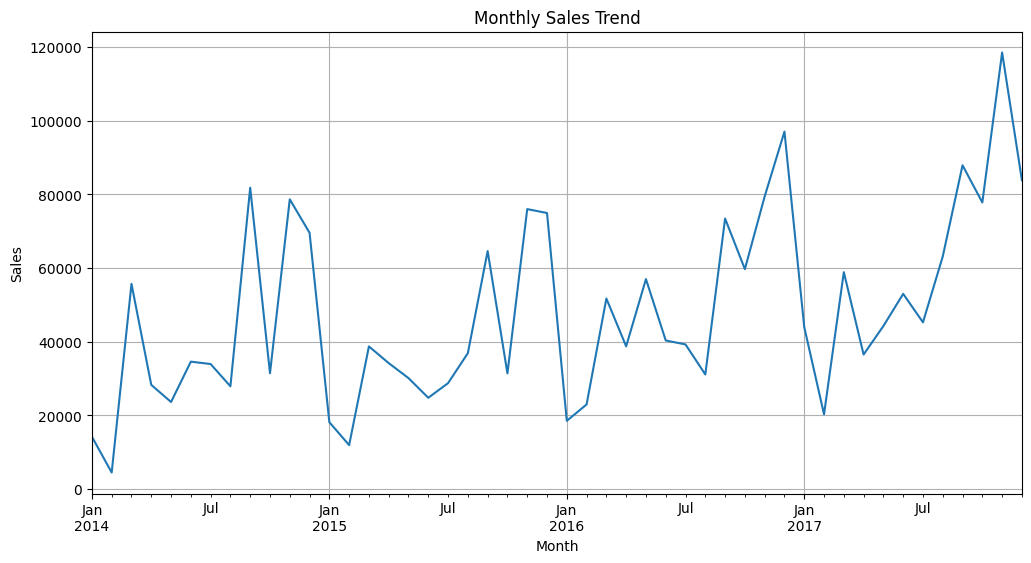

In [20]:
# plt.savefig("monthly_sales_trend.png")


plt.figure(figsize=(12, 6))
df.groupby(df['order_date'].dt.to_period('M'))['sales'].sum().plot()


plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)

# Save 
plt.savefig("monthly_sales_trend.png") 
plt.show()  



# Phase 5: Optional – Flask Dashboard (If Advanced)

In [22]:
# # app.py
# from flask import Flask, render_template
# import pandas as pd

# app = Flask(__name__)

# @app.route('/')
# def index():
#     df = pd.read_csv("superstore.csv")
#     total_sales = df['sales'].sum()
#     return render_template('dashboard.html', total_sales=total_sales)

# if __name__ == '__main__':
#     app.run(debug=True)


In [25]:
# !pip install flask